In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
24/37 [==================>...........] - ETA: 0s - loss: 2.2529 - accuracy: 0.1615 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 1s 9ms/step - loss: 2.2166 - accuracy: 0.1798 - val_loss: 2.0934 - val_accuracy: 0.3010
Epoch 2/1000
32/37 [========================>.....] - ETA: 0s - loss: 2.0623 - accuracy: 0.2546
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 2.0494 - accuracy: 0.2633 - val_loss: 1.9394 - val_accuracy: 0.3219
Epoch 3/1000
28/37 [=====================>........] - ETA: 0s - loss: 1.9095 - accuracy: 0.3022
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 1.8944 - accuracy: 0.3043 - val_loss: 1.7483 - val_accuracy: 0.4138
Epoch 4/1000
27/37 [====================>.........] - ETA: 0s - loss: 1.7713 - accuracy: 0.3403


26/37 [====================>.........] - ETA: 0s - loss: 1.1203 - accuracy: 0.5820
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 1.1186 - accuracy: 0.5826 - val_loss: 0.7747 - val_accuracy: 0.7890
Epoch 29/1000
28/37 [=====================>........] - ETA: 0s - loss: 1.0894 - accuracy: 0.5954
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.5953 - val_loss: 0.7599 - val_accuracy: 0.7896
Epoch 30/1000
28/37 [=====================>........] - ETA: 0s - loss: 1.1183 - accuracy: 0.5926
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.5904 - val_loss: 0.7501 - val_accuracy: 0.7985
Epoch 31/1000
33/37 [=========================>....] - ETA: 0s - loss: 1.0912 - accuracy: 0.5987
Epoch 31

34/37 [==========================>...] - ETA: 0s - loss: 0.9914 - accuracy: 0.6399
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9890 - accuracy: 0.6405 - val_loss: 0.5964 - val_accuracy: 0.8612
Epoch 56/1000
34/37 [==========================>...] - ETA: 0s - loss: 0.9756 - accuracy: 0.6459
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9842 - accuracy: 0.6407 - val_loss: 0.5942 - val_accuracy: 0.8657
Epoch 57/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.9725 - accuracy: 0.6497
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.6503 - val_loss: 0.5943 - val_accuracy: 0.8644
Epoch 58/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.9815 - accuracy: 0.6496
Epoch 58

33/37 [=========================>....] - ETA: 0s - loss: 0.9300 - accuracy: 0.6648
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9308 - accuracy: 0.6663 - val_loss: 0.5364 - val_accuracy: 0.8758
Epoch 83/1000
36/37 [============================>.] - ETA: 0s - loss: 0.9205 - accuracy: 0.6706
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9231 - accuracy: 0.6695 - val_loss: 0.5273 - val_accuracy: 0.8828
Epoch 84/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.9425 - accuracy: 0.6654
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 0.9367 - accuracy: 0.6674 - val_loss: 0.5272 - val_accuracy: 0.8853
Epoch 85/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.9052 - accuracy: 0.6794
Epoch 85

32/37 [========================>.....] - ETA: 0s - loss: 0.9020 - accuracy: 0.6907
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9060 - accuracy: 0.6877 - val_loss: 0.4922 - val_accuracy: 0.8961
Epoch 110/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.9052 - accuracy: 0.6724
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8882 - accuracy: 0.6813 - val_loss: 0.4958 - val_accuracy: 0.8853
Epoch 111/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8783 - accuracy: 0.6863
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8757 - accuracy: 0.6864 - val_loss: 0.4897 - val_accuracy: 0.8948
Epoch 112/1000
36/37 [============================>.] - ETA: 0s - loss: 0.9014 - accuracy: 0.6823
Ep

Epoch 136/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.8923 - accuracy: 0.6930
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8923 - accuracy: 0.6900 - val_loss: 0.4734 - val_accuracy: 0.8992
Epoch 137/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8862 - accuracy: 0.6862
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.6845 - val_loss: 0.4741 - val_accuracy: 0.9049
Epoch 138/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8627 - accuracy: 0.6917
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8693 - accuracy: 0.6885 - val_loss: 0.4681 - val_accuracy: 0.9068
Epoch 139/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8886 - accu

Epoch 163/1000
28/37 [=====================>........] - ETA: 0s - loss: 0.8434 - accuracy: 0.6967
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8462 - accuracy: 0.6961 - val_loss: 0.4513 - val_accuracy: 0.9068
Epoch 164/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8684 - accuracy: 0.6851
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8655 - accuracy: 0.6864 - val_loss: 0.4615 - val_accuracy: 0.9049
Epoch 165/1000
29/37 [======================>.......] - ETA: 0s - loss: 0.8686 - accuracy: 0.6945
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 0.8748 - accuracy: 0.6927 - val_loss: 0.4584 - val_accuracy: 0.9005
Epoch 166/1000
28/37 [=====================>........] - ETA: 0s - loss: 0.8705 - accu

Epoch 190/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.8555 - accuracy: 0.6976
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.6963 - val_loss: 0.4542 - val_accuracy: 0.8999
Epoch 191/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.8392 - accuracy: 0.7044
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.7022 - val_loss: 0.4479 - val_accuracy: 0.9062
Epoch 192/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8343 - accuracy: 0.7062
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8319 - accuracy: 0.7058 - val_loss: 0.4495 - val_accuracy: 0.9011
Epoch 193/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.8137 - accu

Epoch 217/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8307 - accuracy: 0.7056
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.7044 - val_loss: 0.4478 - val_accuracy: 0.9043
Epoch 218/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8283 - accuracy: 0.6970
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6963 - val_loss: 0.4464 - val_accuracy: 0.9018
Epoch 219/1000
34/37 [==========================>...] - ETA: 0s - loss: 0.8370 - accuracy: 0.6999
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6972 - val_loss: 0.4490 - val_accuracy: 0.8980
Epoch 220/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8545 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.9043


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 75ms/step
[1.8454932e-01 1.4411663e-01 2.4206577e-02 2.7477610e-01 1.4040447e-05
 3.1234401e-01 3.1099622e-03 4.4373102e-02 1.2510261e-02]
5


# 混同行列

50/50 [==============================] - 0s 833us/step


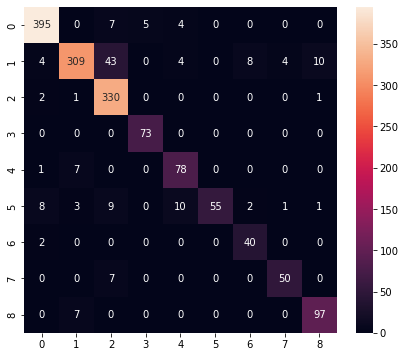

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       411
           1       0.94      0.81      0.87       382
           2       0.83      0.99      0.90       334
           3       0.94      1.00      0.97        73
           4       0.81      0.91      0.86        86
           5       1.00      0.62      0.76        89
           6       0.80      0.95      0.87        42
           7       0.91      0.88      0.89        57
           8       0.89      0.93      0.91       104

    accuracy                           0.90      1578
   macro avg       0.90      0.89      0.89      1578
weighted avg       0.91      0.90      0.90      1578



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\nicho\AppData\Local\Temp\tmptgxsehfd\assets


6764

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8454933e-01 1.4411676e-01 2.4206568e-02 2.7477595e-01 1.4040450e-05
 3.1234404e-01 3.1099610e-03 4.4373110e-02 1.2510265e-02]
5
